In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

In [24]:
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_images, valid_images, train_labels, valid_labels = train_test_split(train_images,
                                                                          train_labels, test_size=0.25, random_state=123)

In [31]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3,3), padding='same', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(64, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(128, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(256, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(256, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(256, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(256, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(512, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(512, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(512, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(512, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(4096, activation = 'relu'))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(4096, activation = 'relu'))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(10, activation='softmax'))

In [32]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_89 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_86 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
activation_86 (Activation)   (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_87 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
activation_87 (Activation)   (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 14, 14, 64)      

In [33]:
model.compile(optimizer = keras.optimizers.Adam(lr=0.01),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights=True)

history = model.fit(train_images, train_labels, epochs = 50,
                    validation_data=(valid_images, valid_labels),
                    callbacks = [early_stopping_cb],
                    batch_size = 64, shuffle=True)

Epoch 1/50
704/704 [==============================] - 29s 42ms/step - loss: 4.4284 - accuracy: 0.1992 - val_loss: 3.9890 - val_accuracy: 0.1125
Epoch 2/50
704/704 [==============================] - 29s 42ms/step - loss: 0.9957 - accuracy: 0.5688 - val_loss: 1.7762 - val_accuracy: 0.4879
Epoch 3/50
704/704 [==============================] - 29s 42ms/step - loss: 0.2595 - accuracy: 0.9354 - val_loss: 2.2636 - val_accuracy: 0.6045
Epoch 4/50
704/704 [==============================] - 30s 42ms/step - loss: 0.1884 - accuracy: 0.9553 - val_loss: 0.2141 - val_accuracy: 0.9581
Epoch 5/50
704/704 [==============================] - 30s 42ms/step - loss: 0.1230 - accuracy: 0.9724 - val_loss: 0.0968 - val_accuracy: 0.9823
Epoch 6/50
704/704 [==============================] - 30s 42ms/step - loss: 0.2025 - accuracy: 0.9582 - val_loss: 0.2448 - val_accuracy: 0.9485
Epoch 7/50
704/704 [==============================] - 30s 43ms/step - loss: 0.1036 - accuracy: 0.9764 - val_loss: 0.0809 - val_accuracy:

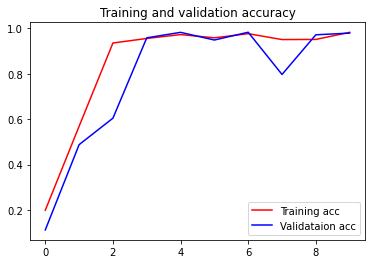

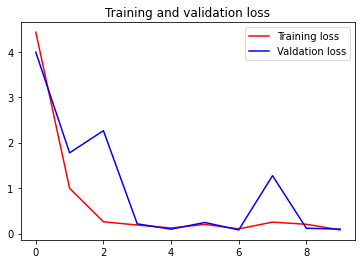

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validataion acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Valdation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [38]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 0.0696 - accuracy: 0.9846


[0.06956308335065842, 0.9846000075340271]